In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: ABB
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


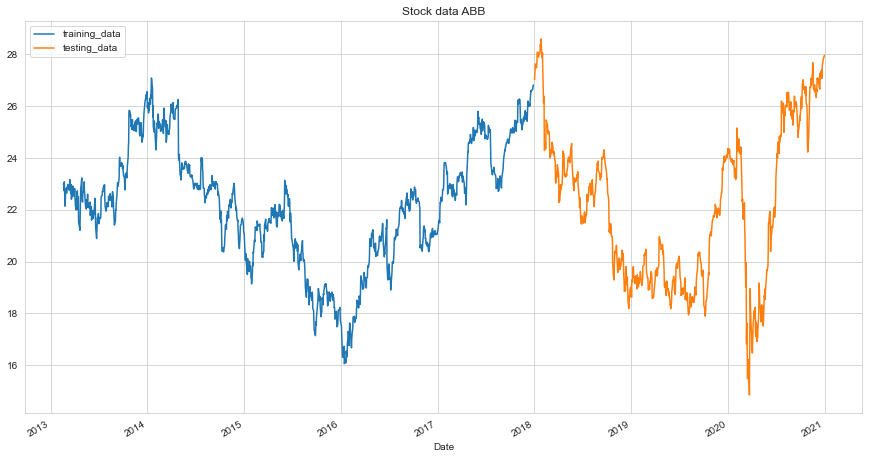

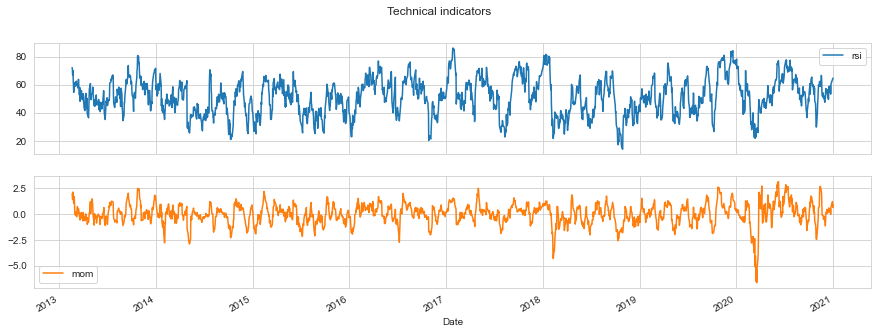

In [2]:
stock_name = 'abb'.upper()
industry = 'Industrial'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1149.62, duration: 0:00:00.210063
episode: 2/2000, episode end value: 1084.59, duration: 0:00:00.193043
episode: 3/2000, episode end value: 1094.10, duration: 0:00:00.190023
episode: 4/2000, episode end value: 1105.62, duration: 0:00:00.189709
episode: 5/2000, episode end value: 1071.19, duration: 0:00:00.190086
episode: 6/2000, episode end value: 1088.73, duration: 0:00:00.186231
episode: 7/2000, episode end value: 1082.89, duration: 0:00:00.181042
episode: 8/2000, episode end value: 1136.22, duration: 0:00:00.185042
episode: 9/2000, episode end value: 1099.85, duration: 0:00:00.190042
episode: 10/2000, episode end value: 1122.88, duration: 0:00:00.181050
episode: 11/2000, episode end value: 1074.73, duration: 0:00:00.184044
episode: 12/2000, episode end value: 1102.49, duration: 0:00:00.198537
episode: 13/2000, episode end value: 1099.68, duration: 0:00:00.185060
episode: 14/2000, episode end value: 1098.55, duration: 0:00:00.196024
episode: 15/200

episode: 118/2000, episode end value: 1082.79, duration: 0:00:00.186063
episode: 119/2000, episode end value: 1120.39, duration: 0:00:00.182020
episode: 120/2000, episode end value: 1117.84, duration: 0:00:00.177072
episode: 121/2000, episode end value: 1100.58, duration: 0:00:00.194529
episode: 122/2000, episode end value: 1116.21, duration: 0:00:00.203237
episode: 123/2000, episode end value: 1116.54, duration: 0:00:00.222348
episode: 124/2000, episode end value: 1107.15, duration: 0:00:00.189964
episode: 125/2000, episode end value: 1122.52, duration: 0:00:00.208795
episode: 126/2000, episode end value: 1106.23, duration: 0:00:00.204293
episode: 127/2000, episode end value: 1121.57, duration: 0:00:00.194683
episode: 128/2000, episode end value: 1116.60, duration: 0:00:00.201236
episode: 129/2000, episode end value: 1110.36, duration: 0:00:00.198176
episode: 130/2000, episode end value: 1101.76, duration: 0:00:00.193134
episode: 131/2000, episode end value: 1078.07, duration: 0:00:00

episode: 232/2000, episode end value: 1195.23, duration: 0:00:00.215319
episode: 233/2000, episode end value: 1076.76, duration: 0:00:00.221034
episode: 234/2000, episode end value: 1121.24, duration: 0:00:00.206466
episode: 235/2000, episode end value: 1098.70, duration: 0:00:00.227270
episode: 236/2000, episode end value: 1094.57, duration: 0:00:00.206919
episode: 237/2000, episode end value: 1159.51, duration: 0:00:00.202824
episode: 238/2000, episode end value: 1090.77, duration: 0:00:00.228519
episode: 239/2000, episode end value: 1147.16, duration: 0:00:00.239393
episode: 240/2000, episode end value: 1114.60, duration: 0:00:00.220168
episode: 241/2000, episode end value: 1095.90, duration: 0:00:00.232845
episode: 242/2000, episode end value: 1089.75, duration: 0:00:00.208047
episode: 243/2000, episode end value: 1097.59, duration: 0:00:00.221049
episode: 244/2000, episode end value: 1098.42, duration: 0:00:00.233148
episode: 245/2000, episode end value: 1121.38, duration: 0:00:00

episode: 346/2000, episode end value: 1180.59, duration: 0:00:00.267723
episode: 347/2000, episode end value: 1108.28, duration: 0:00:00.246875
episode: 348/2000, episode end value: 1152.00, duration: 0:00:00.291382
episode: 349/2000, episode end value: 1144.43, duration: 0:00:00.274125
episode: 350/2000, episode end value: 1113.75, duration: 0:00:00.246314
episode: 351/2000, episode end value: 1148.40, duration: 0:00:00.310513
episode: 352/2000, episode end value: 1130.21, duration: 0:00:00.293108
episode: 353/2000, episode end value: 1160.87, duration: 0:00:00.259485
episode: 354/2000, episode end value: 1161.42, duration: 0:00:00.275244
episode: 355/2000, episode end value: 1138.25, duration: 0:00:00.267062
episode: 356/2000, episode end value: 1133.43, duration: 0:00:00.306701
episode: 357/2000, episode end value: 1119.92, duration: 0:00:00.312231
episode: 358/2000, episode end value: 1088.98, duration: 0:00:00.302881
episode: 359/2000, episode end value: 1119.83, duration: 0:00:00

episode: 460/2000, episode end value: 1140.51, duration: 0:00:00.333735
episode: 461/2000, episode end value: 1112.39, duration: 0:00:00.359222
episode: 462/2000, episode end value: 1119.58, duration: 0:00:00.335985
episode: 463/2000, episode end value: 1103.44, duration: 0:00:00.322885
episode: 464/2000, episode end value: 1134.81, duration: 0:00:00.364449
episode: 465/2000, episode end value: 1148.53, duration: 0:00:00.378438
episode: 466/2000, episode end value: 1117.52, duration: 0:00:00.398618
episode: 467/2000, episode end value: 1116.44, duration: 0:00:00.409147
episode: 468/2000, episode end value: 1073.31, duration: 0:00:00.432750
episode: 469/2000, episode end value: 1099.41, duration: 0:00:00.361370
episode: 470/2000, episode end value: 1073.50, duration: 0:00:00.509755
episode: 471/2000, episode end value: 1088.58, duration: 0:00:00.331498
episode: 472/2000, episode end value: 1123.26, duration: 0:00:00.361867
episode: 473/2000, episode end value: 1094.78, duration: 0:00:00

episode: 574/2000, episode end value: 1162.51, duration: 0:00:00.355895
episode: 575/2000, episode end value: 1128.31, duration: 0:00:00.450105
episode: 576/2000, episode end value: 1140.04, duration: 0:00:00.496090
episode: 577/2000, episode end value: 1093.78, duration: 0:00:00.440101
episode: 578/2000, episode end value: 1104.76, duration: 0:00:00.381583
episode: 579/2000, episode end value: 1079.82, duration: 0:00:00.432854
episode: 580/2000, episode end value: 1108.29, duration: 0:00:00.390745
episode: 581/2000, episode end value: 1151.96, duration: 0:00:00.443217
episode: 582/2000, episode end value: 1157.61, duration: 0:00:00.270644
episode: 583/2000, episode end value: 1098.03, duration: 0:00:00.303140
episode: 584/2000, episode end value: 1255.08, duration: 0:00:00.349106
episode: 585/2000, episode end value: 1250.05, duration: 0:00:00.333549
episode: 586/2000, episode end value: 1094.50, duration: 0:00:00.351060
episode: 587/2000, episode end value: 1153.81, duration: 0:00:00

episode: 688/2000, episode end value: 1109.31, duration: 0:00:00.448212
episode: 689/2000, episode end value: 1138.16, duration: 0:00:00.398266
episode: 690/2000, episode end value: 1077.19, duration: 0:00:00.418788
episode: 691/2000, episode end value: 1113.32, duration: 0:00:00.491313
episode: 692/2000, episode end value: 1163.09, duration: 0:00:00.414343
episode: 693/2000, episode end value: 1094.98, duration: 0:00:00.349953
episode: 694/2000, episode end value: 1124.00, duration: 0:00:00.443500
episode: 695/2000, episode end value: 1184.26, duration: 0:00:00.482920
episode: 696/2000, episode end value: 1102.46, duration: 0:00:00.374935
episode: 697/2000, episode end value: 1170.26, duration: 0:00:00.326464
episode: 698/2000, episode end value: 1124.14, duration: 0:00:00.410670
episode: 699/2000, episode end value: 1169.49, duration: 0:00:00.489788
episode: 700/2000, episode end value: 1131.72, duration: 0:00:00.418642
episode: 701/2000, episode end value: 1161.66, duration: 0:00:00

episode: 802/2000, episode end value: 1131.57, duration: 0:00:00.396368
episode: 803/2000, episode end value: 1149.66, duration: 0:00:00.476861
episode: 804/2000, episode end value: 1129.55, duration: 0:00:00.461335
episode: 805/2000, episode end value: 1112.68, duration: 0:00:00.360872
episode: 806/2000, episode end value: 1080.31, duration: 0:00:00.443670
episode: 807/2000, episode end value: 1120.19, duration: 0:00:00.374986
episode: 808/2000, episode end value: 1103.54, duration: 0:00:00.428367
episode: 809/2000, episode end value: 1126.82, duration: 0:00:00.362099
episode: 810/2000, episode end value: 1093.80, duration: 0:00:00.361991
episode: 811/2000, episode end value: 1121.21, duration: 0:00:00.345275
episode: 812/2000, episode end value: 1149.91, duration: 0:00:00.374242
episode: 813/2000, episode end value: 1139.55, duration: 0:00:00.320492
episode: 814/2000, episode end value: 1180.01, duration: 0:00:00.327683
episode: 815/2000, episode end value: 1135.78, duration: 0:00:00

episode: 916/2000, episode end value: 1122.98, duration: 0:00:00.365549
episode: 917/2000, episode end value: 1083.01, duration: 0:00:00.414400
episode: 918/2000, episode end value: 1079.17, duration: 0:00:00.361074
episode: 919/2000, episode end value: 1101.55, duration: 0:00:00.378441
episode: 920/2000, episode end value: 1105.47, duration: 0:00:00.310578
episode: 921/2000, episode end value: 1198.79, duration: 0:00:00.349207
episode: 922/2000, episode end value: 1116.05, duration: 0:00:00.380921
episode: 923/2000, episode end value: 1133.44, duration: 0:00:00.394430
episode: 924/2000, episode end value: 1149.67, duration: 0:00:00.396195
episode: 925/2000, episode end value: 1123.85, duration: 0:00:00.436497
episode: 926/2000, episode end value: 1079.68, duration: 0:00:00.356011
episode: 927/2000, episode end value: 1142.61, duration: 0:00:00.341084
episode: 928/2000, episode end value: 1249.28, duration: 0:00:00.447103
episode: 929/2000, episode end value: 1103.82, duration: 0:00:00

episode: 1030/2000, episode end value: 1122.36, duration: 0:00:00.314433
episode: 1031/2000, episode end value: 1240.62, duration: 0:00:00.336988
episode: 1032/2000, episode end value: 1177.66, duration: 0:00:00.278106
episode: 1033/2000, episode end value: 1121.00, duration: 0:00:00.447532
episode: 1034/2000, episode end value: 1148.62, duration: 0:00:00.412136
episode: 1035/2000, episode end value: 1133.56, duration: 0:00:00.395439
episode: 1036/2000, episode end value: 1182.36, duration: 0:00:00.398410
episode: 1037/2000, episode end value: 1117.55, duration: 0:00:00.403436
episode: 1038/2000, episode end value: 1086.26, duration: 0:00:00.357974
episode: 1039/2000, episode end value: 1127.97, duration: 0:00:00.351887
episode: 1040/2000, episode end value: 1160.73, duration: 0:00:00.362329
episode: 1041/2000, episode end value: 1142.44, duration: 0:00:00.443744
episode: 1042/2000, episode end value: 1137.87, duration: 0:00:00.489111
episode: 1043/2000, episode end value: 1113.87, dur

episode: 1143/2000, episode end value: 1135.11, duration: 0:00:00.400360
episode: 1144/2000, episode end value: 1076.12, duration: 0:00:00.528448
episode: 1145/2000, episode end value: 1097.91, duration: 0:00:00.376191
episode: 1146/2000, episode end value: 1136.56, duration: 0:00:00.379323
episode: 1147/2000, episode end value: 1073.56, duration: 0:00:00.444461
episode: 1148/2000, episode end value: 1116.62, duration: 0:00:00.368615
episode: 1149/2000, episode end value: 1119.01, duration: 0:00:00.319654
episode: 1150/2000, episode end value: 1116.11, duration: 0:00:00.444841
episode: 1151/2000, episode end value: 1125.34, duration: 0:00:00.449917
episode: 1152/2000, episode end value: 1128.62, duration: 0:00:00.374547
episode: 1153/2000, episode end value: 1097.86, duration: 0:00:00.365327
episode: 1154/2000, episode end value: 1145.70, duration: 0:00:00.435277
episode: 1155/2000, episode end value: 1114.31, duration: 0:00:00.384914
episode: 1156/2000, episode end value: 1123.17, dur

episode: 1256/2000, episode end value: 1131.89, duration: 0:00:00.375628
episode: 1257/2000, episode end value: 1139.54, duration: 0:00:00.487667
episode: 1258/2000, episode end value: 1137.51, duration: 0:00:00.430009
episode: 1259/2000, episode end value: 1096.91, duration: 0:00:00.517731
episode: 1260/2000, episode end value: 1091.91, duration: 0:00:00.362162
episode: 1261/2000, episode end value: 1084.02, duration: 0:00:00.363719
episode: 1262/2000, episode end value: 1142.62, duration: 0:00:00.333020
episode: 1263/2000, episode end value: 1122.96, duration: 0:00:00.398855
episode: 1264/2000, episode end value: 1118.86, duration: 0:00:00.396747
episode: 1265/2000, episode end value: 1139.36, duration: 0:00:00.434976
episode: 1266/2000, episode end value: 1154.16, duration: 0:00:00.432446
episode: 1267/2000, episode end value: 1112.99, duration: 0:00:00.364782
episode: 1268/2000, episode end value: 1200.15, duration: 0:00:00.378356
episode: 1269/2000, episode end value: 1117.01, dur

episode: 1369/2000, episode end value: 1141.98, duration: 0:00:00.469376
episode: 1370/2000, episode end value: 1139.25, duration: 0:00:00.485575
episode: 1371/2000, episode end value: 1113.43, duration: 0:00:00.494579
episode: 1372/2000, episode end value: 1151.53, duration: 0:00:00.390889
episode: 1373/2000, episode end value: 1138.75, duration: 0:00:00.423789
episode: 1374/2000, episode end value: 1195.30, duration: 0:00:00.319507
episode: 1375/2000, episode end value: 1093.41, duration: 0:00:00.384072
episode: 1376/2000, episode end value: 1150.71, duration: 0:00:00.360138
episode: 1377/2000, episode end value: 1154.92, duration: 0:00:00.375626
episode: 1378/2000, episode end value: 1126.12, duration: 0:00:00.404234
episode: 1379/2000, episode end value: 1122.70, duration: 0:00:00.481683
episode: 1380/2000, episode end value: 1108.06, duration: 0:00:00.427664
episode: 1381/2000, episode end value: 1093.74, duration: 0:00:00.500957
episode: 1382/2000, episode end value: 1118.74, dur

episode: 1482/2000, episode end value: 1134.63, duration: 0:00:00.345534
episode: 1483/2000, episode end value: 1113.67, duration: 0:00:00.474552
episode: 1484/2000, episode end value: 1094.60, duration: 0:00:00.506569
episode: 1485/2000, episode end value: 1102.79, duration: 0:00:00.435228
episode: 1486/2000, episode end value: 1134.10, duration: 0:00:00.433987
episode: 1487/2000, episode end value: 1136.53, duration: 0:00:00.455320
episode: 1488/2000, episode end value: 1071.62, duration: 0:00:00.415820
episode: 1489/2000, episode end value: 1087.13, duration: 0:00:00.473197
episode: 1490/2000, episode end value: 1142.57, duration: 0:00:00.452385
episode: 1491/2000, episode end value: 1130.17, duration: 0:00:00.469126
episode: 1492/2000, episode end value: 1121.95, duration: 0:00:00.493860
episode: 1493/2000, episode end value: 1135.63, duration: 0:00:00.377299
episode: 1494/2000, episode end value: 1072.42, duration: 0:00:00.349948
episode: 1495/2000, episode end value: 1183.40, dur

episode: 1595/2000, episode end value: 1102.46, duration: 0:00:00.345926
episode: 1596/2000, episode end value: 1092.88, duration: 0:00:00.379673
episode: 1597/2000, episode end value: 1134.91, duration: 0:00:00.304606
episode: 1598/2000, episode end value: 1175.36, duration: 0:00:00.445599
episode: 1599/2000, episode end value: 1097.91, duration: 0:00:00.317955
episode: 1600/2000, episode end value: 1108.91, duration: 0:00:00.453531
episode: 1601/2000, episode end value: 1202.09, duration: 0:00:00.368671
episode: 1602/2000, episode end value: 1120.33, duration: 0:00:00.307620
episode: 1603/2000, episode end value: 1149.17, duration: 0:00:00.417100
episode: 1604/2000, episode end value: 1163.37, duration: 0:00:00.416138
episode: 1605/2000, episode end value: 1127.67, duration: 0:00:00.405315
episode: 1606/2000, episode end value: 1119.96, duration: 0:00:00.405206
episode: 1607/2000, episode end value: 1079.51, duration: 0:00:00.375121
episode: 1608/2000, episode end value: 1152.15, dur

episode: 1708/2000, episode end value: 1146.64, duration: 0:00:00.344731
episode: 1709/2000, episode end value: 1156.83, duration: 0:00:00.365823
episode: 1710/2000, episode end value: 1144.22, duration: 0:00:00.367366
episode: 1711/2000, episode end value: 1139.55, duration: 0:00:00.455244
episode: 1712/2000, episode end value: 1125.30, duration: 0:00:00.443917
episode: 1713/2000, episode end value: 1143.44, duration: 0:00:00.385286
episode: 1714/2000, episode end value: 1107.21, duration: 0:00:00.357534
episode: 1715/2000, episode end value: 1094.10, duration: 0:00:00.400928
episode: 1716/2000, episode end value: 1100.56, duration: 0:00:00.376967
episode: 1717/2000, episode end value: 1124.30, duration: 0:00:00.411634
episode: 1718/2000, episode end value: 1093.81, duration: 0:00:00.415588
episode: 1719/2000, episode end value: 1119.93, duration: 0:00:00.354706
episode: 1720/2000, episode end value: 1144.41, duration: 0:00:00.461204
episode: 1721/2000, episode end value: 1118.85, dur

episode: 1821/2000, episode end value: 1105.02, duration: 0:00:00.368647
episode: 1822/2000, episode end value: 1110.67, duration: 0:00:00.483945
episode: 1823/2000, episode end value: 1157.52, duration: 0:00:00.460113
episode: 1824/2000, episode end value: 1086.68, duration: 0:00:00.372420
episode: 1825/2000, episode end value: 1087.70, duration: 0:00:00.343107
episode: 1826/2000, episode end value: 1112.50, duration: 0:00:00.492451
episode: 1827/2000, episode end value: 1187.98, duration: 0:00:00.426104
episode: 1828/2000, episode end value: 1088.52, duration: 0:00:00.387839
episode: 1829/2000, episode end value: 1129.29, duration: 0:00:00.394582
episode: 1830/2000, episode end value: 1149.93, duration: 0:00:00.447030
episode: 1831/2000, episode end value: 1101.49, duration: 0:00:00.411577
episode: 1832/2000, episode end value: 1127.05, duration: 0:00:00.432418
episode: 1833/2000, episode end value: 1077.70, duration: 0:00:00.456155
episode: 1834/2000, episode end value: 1110.41, dur

episode: 1934/2000, episode end value: 1127.68, duration: 0:00:00.366460
episode: 1935/2000, episode end value: 1124.97, duration: 0:00:00.356428
episode: 1936/2000, episode end value: 1171.27, duration: 0:00:00.356554
episode: 1937/2000, episode end value: 1241.36, duration: 0:00:00.307802
episode: 1938/2000, episode end value: 1088.90, duration: 0:00:00.349264
episode: 1939/2000, episode end value: 1148.41, duration: 0:00:00.329936
episode: 1940/2000, episode end value: 1105.01, duration: 0:00:00.319319
episode: 1941/2000, episode end value: 1101.04, duration: 0:00:00.347521
episode: 1942/2000, episode end value: 1146.62, duration: 0:00:00.485623
episode: 1943/2000, episode end value: 1115.87, duration: 0:00:00.398705
episode: 1944/2000, episode end value: 1198.69, duration: 0:00:00.399912
episode: 1945/2000, episode end value: 1116.42, duration: 0:00:00.335447
episode: 1946/2000, episode end value: 1139.94, duration: 0:00:00.426644
episode: 1947/2000, episode end value: 1114.55, dur

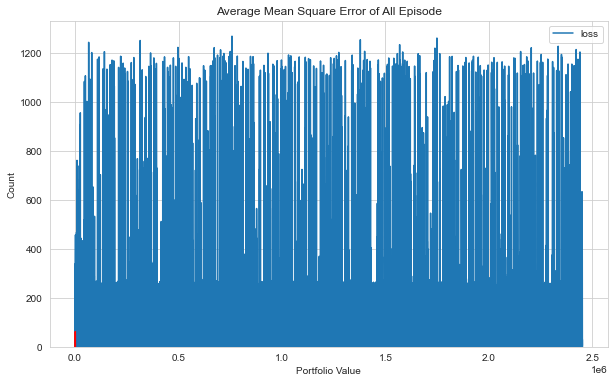

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

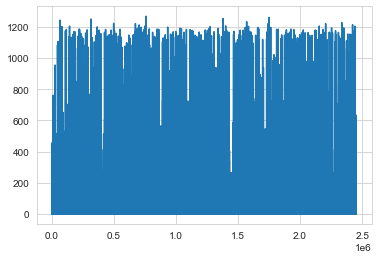

In [5]:
plt.plot(agent.model.losses)

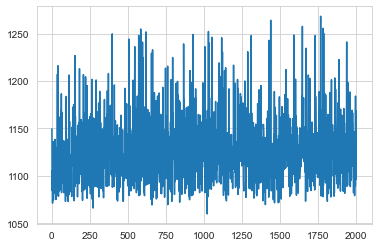

In [6]:
plt.plot(portfolio_value)

episode end value: 1065.13, duration: 0:00:00.157324
Sell: 169 times, Buy: 170 times


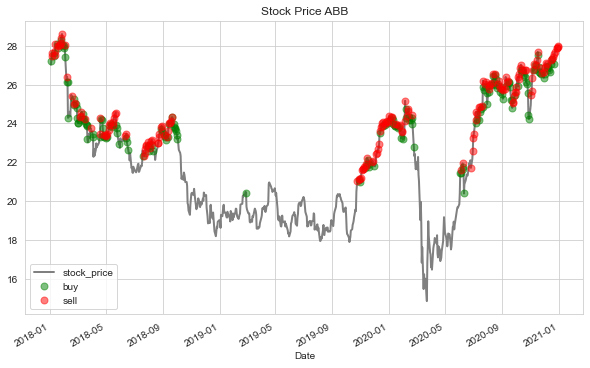

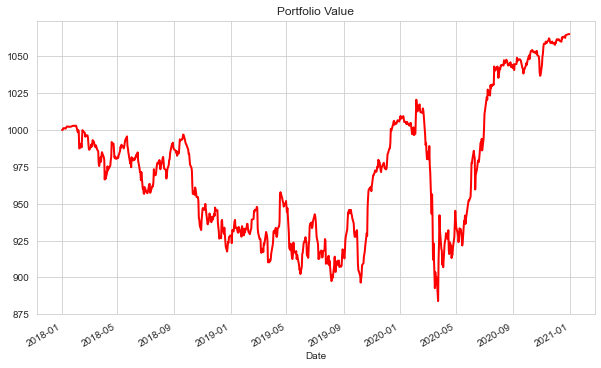

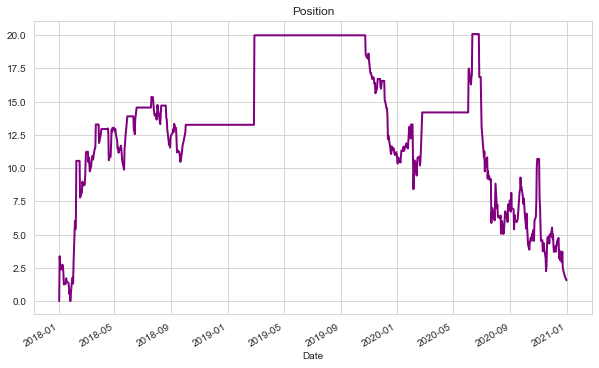

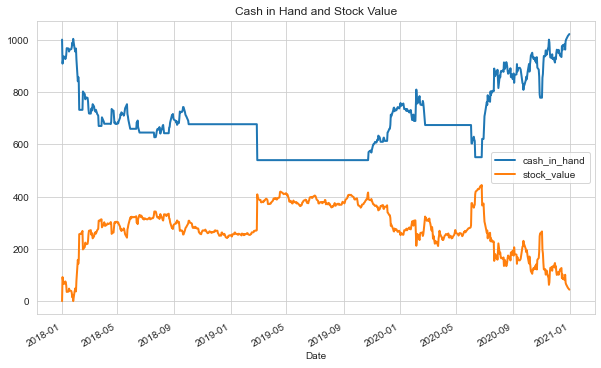

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: ABB
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 2.13 %
Volatility: 0.0839
shape ratio: 0.1223
Maximun drawdown: -13.39 %
Calmar ratio: 0.1587
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): 1.15 %
Volatility (benchmark): 0.2853
shape ratio: 0.0016
Maximun drawdown: -48.08 %
Calmar ratio (benchmark): 0.0238


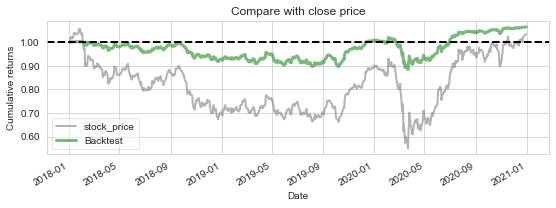

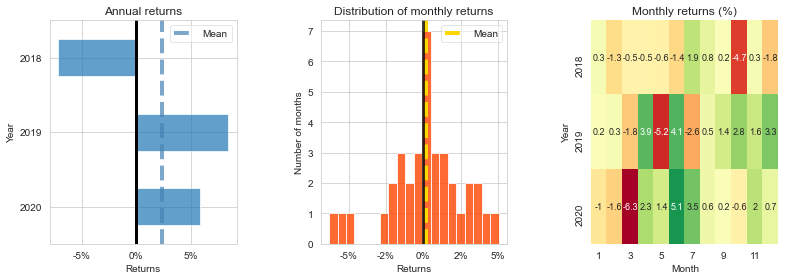

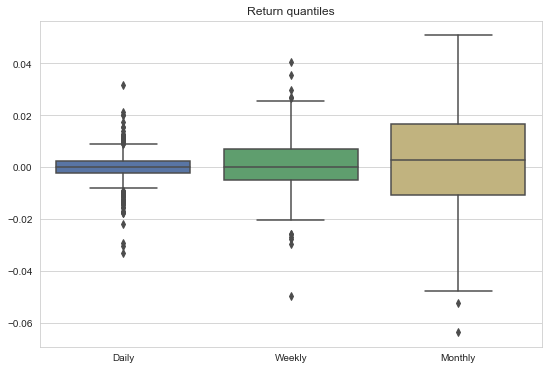

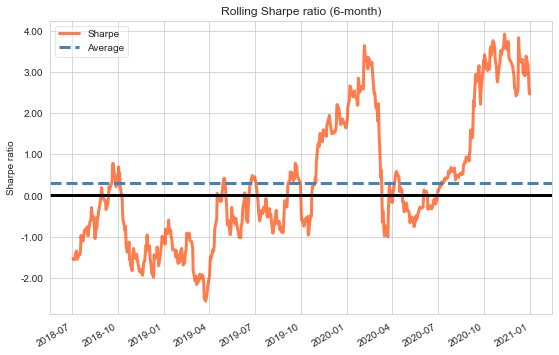

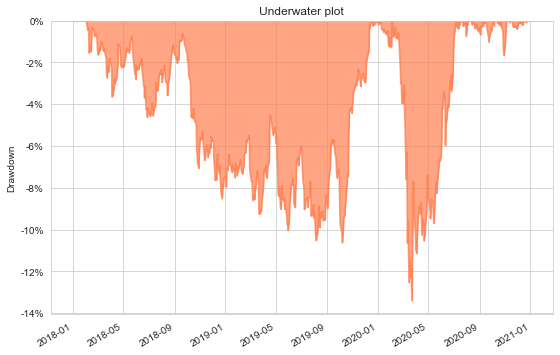

In [9]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')